# LAB 04.02 - Buiding Datasets

## Understand the ASHRAE Energy Prediction in Kaggle

Follow this link: [https://www.kaggle.com/c/ashrae-energy-prediction](https://www.kaggle.com/c/ashrae-energy-prediction), register for the task and download the data.

In particular, understand:

- The machine learning task they define (what they want to predict)
- How the data is provided
- The structure and relation between the files `train.csv`, `weather_train.csv` and `building_metadata.csv`

## Task 1: Build a training dataset

Execute the cell below and you will be given a **building_id** and a **date**. You will have to:

1. Build a table containing one row per hour and the following columns **only for that building_id and date**: 
       'meter_reading', 'site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'square_feet', 'year_built'
   Note that you will have to gather this information from the different csv sources.
   
1. use only measures with `meter`=0
1. Fill any missing values with zero.
1. Extract the column of the target variable and sum all values.
1. Sum all the values of the rest of the columns.
1. Fill in those values in the variables below.
1. Submit your answer.

Observe that, with this dataset, we could train a model to make predictions of the target variable, taking the rest of the variables as input.

For instance, for building number 900, on 2016-02-01:
- there are 24 records
- the sum of all values of the target variable is 4941 (cropping decimals)
- the sum of all values of the rest of the variables is 2705422 (cropping decimals)

In [6]:
from IPython.display import Image
from local.lib import labutils
import numpy as np
bid, date = labutils.biddate_for_student(student.user_id)
print("your building_id", bid)
print("your date       ", date)

your building_id 990
your date        2016-02-11


# Preparation

In [7]:
 !pip install -q kaggle
 from google.colab import files 

In [ ]:
 files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list


ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25           1743         67  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00           1216         36  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10           1210         43  1.0              
datascientistanna/customers-dataset                           Shop Customer Data                    

In [ ]:
!kaggle competitions download -c ashrae-energy-prediction

100% 377M/379M [00:14<00:00, 32.2MB/s]
100% 379M/379M [00:14<00:00, 28.0MB/s]


In [ ]:
!mkdir ashrae-energy
!unzip ashrae-energy-prediction.zip -d ashrae-energy/

Archive:  ashrae-energy-prediction.zip
  inflating: ashrae-energy/building_metadata.csv  
  inflating: ashrae-energy/sample_submission.csv  
  inflating: ashrae-energy/test.csv  
  inflating: ashrae-energy/train.csv  
  inflating: ashrae-energy/weather_test.csv  
  inflating: ashrae-energy/weather_train.csv  


In [ ]:
import pandas as pd

# Building_metadata dataset

In [ ]:
building_metdata = pd.read_csv("ashrae-energy/building_metadata.csv")
building_metdata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [ ]:
building_metdata = building_metdata.drop(["floor_count"], axis = 1)

In [ ]:
#building_metdata = building_metdata.set_index("building_id")

#uilding_metdata

,site_id,primary_use,square_feet,year_built
building_id,,,,
0,0,Education,7432,2008.0
1,0,Education,2720,2004.0
2,0,Education,5376,1991.0
3,0,Education,23685,2002.0
4,0,Education,116607,1975.0
...,...,...,...,...
1444,15,Entertainment/public assembly,19619,1914.0
1445,15,Education,4298,NaN
1446,15,Entertainment/public assembly,11265,1997.0


# weather_train 

In [ ]:
weather_train = pd.read_csv("ashrae-energy/weather_train.csv")
weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [ ]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


# train

In [ ]:
train = pd.read_csv("ashrae-energy/train.csv")
train

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [ ]:
train.timestamp = pd.to_datetime(train.timestamp)

In [ ]:
train.timestamp.dtype

dtype('<M8[ns]')

# Slicing

your building_id 990

your date        2016-02-11

In [ ]:
building_metadata_slice = building_metdata[building_metdata["building_id"] == 990]
building_metadata_slice

,site_id,building_id,primary_use,square_feet,year_built
990,9,990,Office,82939,NaN


Nuestro Site ID es 9

In [ ]:
weather_train_slice = weather_train.loc[(weather_train.site_id == 9)]
weather_train_slice = weather_train_slice.query('timestamp.between("2016-02-11 00:00:00", "2016-02-11 23:00:00")')
weather_train_slice.head(10)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
79811,9,2016-02-11 00:00:00,21.1,0.0,2.2,0.0,1022.8,NaN,2.1
79812,9,2016-02-11 01:00:00,18.9,0.0,1.1,0.0,1022.6,190.0,2.1
79813,9,2016-02-11 02:00:00,16.7,0.0,0.6,0.0,1022.7,200.0,1.5
79814,9,2016-02-11 03:00:00,15.6,0.0,1.1,0.0,1022.5,220.0,2.1
79815,9,2016-02-11 04:00:00,15.0,0.0,0.6,0.0,1022.3,210.0,2.1
79816,9,2016-02-11 05:00:00,13.3,0.0,0.0,0.0,1022.3,160.0,3.6
79817,9,2016-02-11 06:00:00,13.9,0.0,0.6,0.0,1021.6,200.0,2.1
79818,9,2016-02-11 07:00:00,13.3,0.0,1.1,0.0,1021.1,0.0,0.0
79819,9,2016-02-11 08:00:00,12.2,0.0,1.7,0.0,1020.8,0.0,0.0
79820,9,2016-02-11 09:00:00,13.3,0.0,2.2,0.0,1020.4,NaN,2.1


In [ ]:
weather_train_slice.timestamp = pd.to_datetime(weather_train_slice.timestamp)

In [ ]:
weather_train_slice.dtypes

site_id                        int64
timestamp             datetime64[ns]
air_temperature              float64
cloud_coverage               float64
dew_temperature              float64
precip_depth_1_hr            float64
sea_level_pressure           float64
wind_direction               float64
wind_speed                   float64
dtype: object

In [ ]:
weather_train_slice = weather_train_slice.set_index("timestamp")
weather_train_slice.head(5)

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-02-11 00:00:00,9,21.1,0.0,2.2,0.0,1022.8,NaN,2.1
2016-02-11 01:00:00,9,18.9,0.0,1.1,0.0,1022.6,190.0,2.1
2016-02-11 02:00:00,9,16.7,0.0,0.6,0.0,1022.7,200.0,1.5
2016-02-11 03:00:00,9,15.6,0.0,1.1,0.0,1022.5,220.0,2.1
2016-02-11 04:00:00,9,15.0,0.0,0.6,0.0,1022.3,210.0,2.1


In [ ]:
train_slice = train.query(
    'timestamp.between("2016-02-11 00:00:00", "2016-02-11 23:00:00")'
    ).loc[(train.building_id == 990)]
train_slice = train_slice.loc[(train_slice.meter == 0)]
train_slice

,building_id,meter,timestamp,meter_reading
2259783,990,0,2016-02-11 00:00:00,57.0
2261849,990,0,2016-02-11 01:00:00,55.0
2263920,990,0,2016-02-11 02:00:00,53.0
2265990,990,0,2016-02-11 03:00:00,53.0
2268060,990,0,2016-02-11 04:00:00,53.0
2270130,990,0,2016-02-11 05:00:00,54.0
2272199,990,0,2016-02-11 06:00:00,95.0
2274264,990,0,2016-02-11 07:00:00,96.0
2276332,990,0,2016-02-11 08:00:00,109.0
2278399,990,0,2016-02-11 09:00:00,116.0


In [ ]:
train_slice.shape

(24, 3)

In [ ]:
train_slice = train_slice.set_index("timestamp")
train_slice.head(5)

,building_id,meter,meter_reading
timestamp,,,
2016-02-11 00:00:00,990,0,57.0
2016-02-11 01:00:00,990,0,55.0
2016-02-11 02:00:00,990,0,53.0
2016-02-11 03:00:00,990,0,53.0
2016-02-11 04:00:00,990,0,53.0


In [ ]:
train_weather_train_merge = train_slice.join(weather_train_slice)
train_weather_train_merge.head(5)

,building_id,meter,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,,,
2016-02-11 00:00:00,990,0,57.0,9,21.1,0.0,2.2,0.0,1022.8,NaN,2.1
2016-02-11 01:00:00,990,0,55.0,9,18.9,0.0,1.1,0.0,1022.6,190.0,2.1
2016-02-11 02:00:00,990,0,53.0,9,16.7,0.0,0.6,0.0,1022.7,200.0,1.5
2016-02-11 03:00:00,990,0,53.0,9,15.6,0.0,1.1,0.0,1022.5,220.0,2.1
2016-02-11 04:00:00,990,0,53.0,9,15.0,0.0,0.6,0.0,1022.3,210.0,2.1


In [ ]:
train_weather_train_merge.shape

(24, 11)

In [ ]:
building_metadata_slice_concat = pd.concat([building_metadata_slice]*train_weather_train_merge.shape[0], ignore_index=True)
building_metadata_slice_concat.head(5)

,site_id,building_id,primary_use,square_feet,year_built
0,9,990,Office,82939,NaN
1,9,990,Office,82939,NaN
2,9,990,Office,82939,NaN
3,9,990,Office,82939,NaN
4,9,990,Office,82939,NaN


In [ ]:
building_metadata_slice_concat["timestamp"] = train_weather_train_merge.index
building_metadata_slice_concat.head(5)

,site_id,building_id,primary_use,square_feet,year_built,timestamp
0,9,990,Office,82939,NaN,2016-02-11 00:00:00
1,9,990,Office,82939,NaN,2016-02-11 01:00:00
2,9,990,Office,82939,NaN,2016-02-11 02:00:00
3,9,990,Office,82939,NaN,2016-02-11 03:00:00
4,9,990,Office,82939,NaN,2016-02-11 04:00:00


In [ ]:
building_metadata_slice_concat = building_metadata_slice_concat.set_index("timestamp")
building_metadata_slice_concat.head(5)

,site_id,building_id,primary_use,square_feet,year_built
timestamp,,,,,
2016-02-11 00:00:00,9,990,Office,82939,NaN
2016-02-11 01:00:00,9,990,Office,82939,NaN
2016-02-11 02:00:00,9,990,Office,82939,NaN
2016-02-11 03:00:00,9,990,Office,82939,NaN
2016-02-11 04:00:00,9,990,Office,82939,NaN


In [ ]:
merged_dataset = train_weather_train_merge.join(building_metadata_slice_concat, lsuffix='_train_weather', rsuffix='_metadata')
merged_dataset.head(5)

,building_id_train_weather,meter,meter_reading,site_id_train_weather,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,site_id_metadata,building_id_metadata,primary_use,square_feet,year_built
timestamp,,,,,,,,,,,,,,,,
2016-02-11 00:00:00,990,0,57.0,9,21.1,0.0,2.2,0.0,1022.8,NaN,2.1,9,990,Office,82939,NaN
2016-02-11 01:00:00,990,0,55.0,9,18.9,0.0,1.1,0.0,1022.6,190.0,2.1,9,990,Office,82939,NaN
2016-02-11 02:00:00,990,0,53.0,9,16.7,0.0,0.6,0.0,1022.7,200.0,1.5,9,990,Office,82939,NaN
2016-02-11 03:00:00,990,0,53.0,9,15.6,0.0,1.1,0.0,1022.5,220.0,2.1,9,990,Office,82939,NaN
2016-02-11 04:00:00,990,0,53.0,9,15.0,0.0,0.6,0.0,1022.3,210.0,2.1,9,990,Office,82939,NaN


## Task 1: Build a training dataset

Execute the cell below and you will be given a **building_id** and a **date**. You will have to:

1. Build a table containing one row per hour and the following columns **only for that building_id and date**: 
       'meter_reading', 'site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'square_feet', 'year_built'
   Note that you will have to gather this information from the different csv sources.
   
1. use only measures with `meter`=0
1. Fill any missing values with zero.
1. Extract the column of the target variable and sum all values.
1. Sum all the values of the rest of the columns.
1. Fill in those values in the variables below.
1. Submit your answer.

Observe that, with this dataset, we could train a model to make predictions of the target variable, taking the rest of the variables as input.

For instance, for building number 900, on 2016-02-01:
- there are 24 records
- the sum of all values of the target variable is 4941 (cropping decimals)
- the sum of all values of the rest of the variables is 2705422 (cropping decimals)

In [ ]:
final_dataset = merged_dataset.copy()
final_dataset = final_dataset.drop(["building_id_train_weather"], axis = 1)
final_dataset = final_dataset.rename(columns={"site_id_metadata": "site_id", "building_id_metadata": "building_id"})
final_dataset.columns

Index(['meter', 'meter_reading', 'site_id_train_weather', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed', 'site_id',
       'building_id', 'primary_use', 'square_feet', 'year_built'],
      dtype='object')

In [ ]:
final_dataset = final_dataset.drop(["site_id_train_weather"], axis = 1)
final_dataset.head(5)

,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,site_id,building_id,primary_use,square_feet,year_built
timestamp,,,,,,,,,,,,,,
2016-02-11 00:00:00,0,57.0,21.1,0.0,2.2,0.0,1022.8,NaN,2.1,9,990,Office,82939,NaN
2016-02-11 01:00:00,0,55.0,18.9,0.0,1.1,0.0,1022.6,190.0,2.1,9,990,Office,82939,NaN
2016-02-11 02:00:00,0,53.0,16.7,0.0,0.6,0.0,1022.7,200.0,1.5,9,990,Office,82939,NaN
2016-02-11 03:00:00,0,53.0,15.6,0.0,1.1,0.0,1022.5,220.0,2.1,9,990,Office,82939,NaN
2016-02-11 04:00:00,0,53.0,15.0,0.0,0.6,0.0,1022.3,210.0,2.1,9,990,Office,82939,NaN


In [ ]:
final_dataset = final_dataset.fillna(0)
final_dataset.isna().sum()

meter                 0
meter_reading         0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
site_id               0
building_id           0
primary_use           0
square_feet           0
year_built            0
dtype: int64

In [ ]:
final_dataset["meter_reading"].sum()

2317.0

In [ ]:
target_columns = ['site_id', 'air_temperature', 'cloud_coverage',
'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
'wind_direction', 'wind_speed', 'square_feet', 'year_built']

In [ ]:
final_dataset_without_target_variable = final_dataset[target_columns]
final_dataset_without_target_variable.head(5)

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,square_feet,year_built
timestamp,,,,,,,,,,
2016-02-11 00:00:00,9,21.1,0.0,2.2,0.0,1022.8,0.0,2.1,82939,0.0
2016-02-11 01:00:00,9,18.9,0.0,1.1,0.0,1022.6,190.0,2.1,82939,0.0
2016-02-11 02:00:00,9,16.7,0.0,0.6,0.0,1022.7,200.0,1.5,82939,0.0
2016-02-11 03:00:00,9,15.6,0.0,1.1,0.0,1022.5,220.0,2.1,82939,0.0
2016-02-11 04:00:00,9,15.0,0.0,0.6,0.0,1022.3,210.0,2.1,82939,0.0


In [ ]:
final_dataset_without_target_variable.sum()

site_id                   216.0
air_temperature           438.2
cloud_coverage              0.0
dew_temperature            41.2
precip_depth_1_hr           0.0
sea_level_pressure      24495.6
wind_direction           2510.0
wind_speed                 54.2
square_feet           1990536.0
year_built                  0.0
dtype: float64

In [ ]:
final_dataset_without_target_variable.sum().sum()

2018291.2

In [ ]:
216.0 + 438.2 + 41.2 + 24495.6 + 2510.0 + 54.2 + 1990536.0

2018291.2

#### provide your answer here, drop the decimals

In [ ]:
# target variable sum
sumY = 2317.0

# input variables sum
sumX = 2018291.2

sumX, sumY

(2018291.2, 2317.0)

## Task 2. Time series missing data fix

Observe how we can fill in missing data in a time series, by simply repeating the last seen value in the missing places.

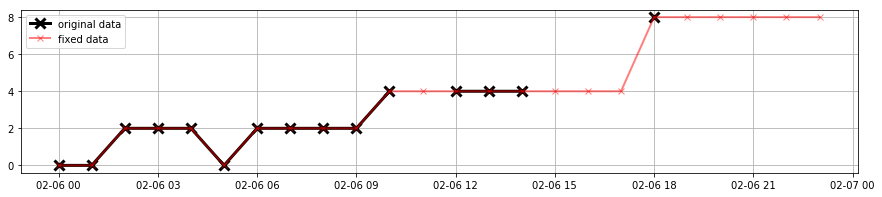

In [ ]:
Image("local/imgs/timeseries-ffill.png")

Using the weather data from the ASHRAE Kaggle competition that you must have downloaded in the previous task you will have to:

1. Extract the time series for the variable `cloud_coverage` for **site_id=3** and for the **date assigned to you** (execute the cell below). This time series will have 24 values (including missing values).
1. Fill in the missing data by repeating the last seen value as in the example above
1. Report the time series as a Pyton list in the variable `fixed_ts` below

Again, use any tool of your choice to generate your result

In [ ]:
from local.lib import labutils
_, date = labutils.biddate_for_student(student.user_id)
print ("your date       ", date)

your date        2016-02-11


In [ ]:
weather_train_task2 = weather_train.loc[(weather_train.site_id == 3)]
weather_train_task2 = weather_train_task2.query('timestamp.between("2016-02-11 00:00:00", "2016-02-11 23:00:00")')
weather_train_task2.head(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
27314,3,2016-02-11 00:00:00,-1.7,8.0,-12.2,0.0,1012.5,290.0,6.7
27315,3,2016-02-11 01:00:00,-2.2,NaN,-11.7,0.0,1013.1,310.0,5.7
27316,3,2016-02-11 02:00:00,-2.8,NaN,-12.2,0.0,1013.6,300.0,7.7
27317,3,2016-02-11 03:00:00,-2.8,8.0,-12.2,0.0,1014.0,300.0,6.7
27318,3,2016-02-11 04:00:00,-3.3,4.0,-12.8,0.0,1014.4,290.0,6.2


In [ ]:
weather_train_task2 = weather_train_task2[["cloud_coverage"]]
weather_train_task2.isna().sum()

cloud_coverage    3
dtype: int64

In [ ]:
weather_train_task2 = weather_train_task2.fillna(method="ffill")
weather_train_task2.isna().sum()

cloud_coverage    0
dtype: int64

In [ ]:
len(weather_train_task2.to_numpy().reshape(-1,)) == len(weather_train_task2)

True

#### fill in your fixed time series

In [ ]:
# for instance
# fixed_ts = [6,6,6,4,4,5,6,7,7,7,6,6,6,5,4,3,2,2,1,1,1,2,3,4]
fixed_ts = weather_train_task2.to_numpy().reshape(-1,)

## Task 3. Build a time series predictive dataset

You will now build a predictive dataset for a single time series. This dataset can later be used with predictive models. The machine learning task we will try to adress is the following:

> **Given three consecutive points of a time series, we want a model to predict the next one.**

Starting from a time series (a list of of $n$ numbers) you will have to build a dataset such as in the following example



[44 45 42 38 47 45 46 44 47 52 53 48 46 42 42 34 30 27 24 24]


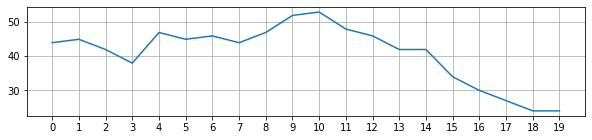

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ts = np.r_[44, 45, 42, 38, 47, 45, 46, 44, 47, 52, 53, 48, 46, 42, 42, 34, 30, 27, 24, 24]
plt.figure(figsize=(10,2))
plt.xticks(range(len(ts)), range(len(ts)))
plt.grid();
plt.plot(ts)
print (ts)


dataset:

    [[[44, 45, 42], 38],
     [[45, 42, 38], 47],
     [[42, 38, 47], 45],
     [[38, 47, 45], 46],
     [[47, 45, 46], 44],
     [[45, 46, 44], 47],
     [[46, 44, 47], 52],
     [[44, 47, 52], 53],
     [[47, 52, 53], 48],
     [[52, 53, 48], 46],
     [[53, 48, 46], 42],
     [[48, 46, 42], 42],
     [[46, 42, 42], 34],
     [[42, 42, 34], 30],
     [[42, 34, 30], 27],
     [[34, 30, 27], 24],
     [[30, 27, 24], 24]]

observe that each line in the dataset represents one input-output pair, like a sliding window over the time series. 

We created two components:

- a matrix $X$ of dimensions `(len(ts)-n,3)` gathering all inputs, in the case above with dimensions `(17,3)`
- a vector $y$ of dimension `(len(ts)-n)` gathering each corresponding expected output, in the case above with dimensions `(17)`.

In this task, you will have to:

1. Take the time series you created in the previous task, where you fixed the missing values.
1. Build $X$, $y$ such as above with $n=3$. If your time series has 24 data points, then X dimensions will be (21,3) and y dimensions will be (21)

Again, use any tool of your choice to generate your result.

In [ ]:
def make_timeseries_dataset(signal, n_timesteps_lookback):
    import pandas as pd
    signal_copy = signal.copy()
    for i in range(1, n_timesteps_lookback+1):
      signal_copy = signal_copy.join(signal.shift(periods = i), 
                                     rsuffix = f"-{i}")
    signal_copy = signal_copy.join(signal.shift(periods=-1), rsuffix="+1")
    return signal_copy.dropna()

In [ ]:
weather_train_task3 = weather_train_task2.reset_index(drop = True)

In [ ]:
weather_train_task3 = weather_train_task3.to_numpy().reshape(-1,)
weather_train_task3

array([8., 8., 8., 8., 4., 2., 4., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4.,
       4., 6., 4., 4., 4., 2., 2.])

In [ ]:
n = 3
x_1 = weather_train_task3[:-n]
x_1

array([8., 8., 8., 8., 4., 2., 4., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4.,
       4., 6., 4., 4.])

In [ ]:
len(weather_train_task3)

24

In [ ]:
x_2 = weather_train_task3[1:-(n-1)]
x_2

array([8., 8., 8., 4., 2., 4., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4.,
       6., 4., 4., 4.])

In [ ]:
x_3 = weather_train_task3[2:-(n-2)]
x_3 

array([8., 8., 4., 2., 4., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4., 6.,
       4., 4., 4., 2.])

In [ ]:
X = [x_1, x_2, x_3]
X = np.asarray(X)
X = X.T
X

array([[8., 8., 8.],
       [8., 8., 8.],
       [8., 8., 4.],
       [8., 4., 2.],
       [4., 2., 4.],
       [2., 4., 2.],
       [4., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 4.],
       [2., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 6.],
       [4., 6., 4.],
       [6., 4., 4.],
       [4., 4., 4.],
       [4., 4., 2.]])

In [ ]:
y = weather_train_task3[n:]
y

array([8., 4., 2., 4., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4., 6., 4.,
       4., 4., 2., 2.])

In [ ]:
np.shape(y)

(21,)